In [ ]:
!pip install pyclustering

     |████████████████████████████████| 2.6MB 6.4MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp37-none-any.whl size=2395105 sha256=9177d7dc41ab2fdf7cca125eb0614c66ce1ff008673018f76c9d8e0968920a88
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


In [ ]:
!python --version

Python 3.7.10


## PySpark Initialisation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [24.7 kB]
Hit:12 http://ppa.launchpad.ne

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-1.8.0-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

In [ ]:
# Make a SparkSession
from pyspark import SparkContext
from pyspark.sql import SparkSession
sc = SparkContext('local[*]')
spark = SparkSession(sc)

In [ ]:
from pyclustering.utils import read_sample
from pyclustering.utils import timedcall

from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.samples.definitions import FCPS_SAMPLES

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.cure import cure

In [ ]:
sample = read_sample(FCPS_SAMPLES.SAMPLE_TETRA)

In [ ]:
dataset = spark.read.option("multiline","true").json('data.json')

In [ ]:
dataset.printSchema()
dataset.show()

root
 |-- data: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: double (containsNull = true)

+--------------------+
|                data|
+--------------------+
|[[1.295428, 0.050...|
+--------------------+



In [ ]:
data = list(dataset.select('data').toPandas()['data'])[0]

In [ ]:
def template_clustering(number_clusters, sample, number_represent_points=5, compression=0.5, draw=True, ccore_flag=True):
    # sample = read_sample(path)
    
    cure_instance = cure(sample, number_clusters, number_represent_points, compression, ccore_flag)
    (ticks, _) = timedcall(cure_instance.process)
    
    clusters = cure_instance.get_clusters()
    representors = cure_instance.get_representors()
    means = cure_instance.get_means()

    # print("Sample: ", path, "\t\tExecution time: ", ticks, "\n")
    print("Execution time: ", ticks, "\n")
    #print([len(cluster) for cluster in clusters])

    if draw is True:
        visualizer = cluster_visualizer()

        visualizer.append_clusters(clusters, sample)

        for cluster_index in range(len(clusters)):
            visualizer.append_cluster_attribute(0, cluster_index, representors[cluster_index], '*', 10)
            visualizer.append_cluster_attribute(0, cluster_index, [ means[cluster_index] ], 'o')

        visualizer.show()

In [ ]:
print(type(data),type(sample))

<class 'list'> <class 'list'>


Execution time:  0.038410570999985794 



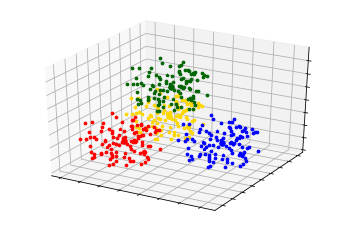

In [ ]:
template_clustering(4, data)